In [ ]:
 !pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 11.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/drive/MyDrive/yolo300/train
!mkdir /content/drive/MyDrive/yolo300/val

In [ ]:
# !unzip /content/drive/MyDrive/yolo300/lung.zip -d /content/drive/MyDrive/yolo300/

Archive:  /content/drive/MyDrive/yolo300/lung.zip
  inflating: /content/drive/MyDrive/yolo300/15.png  
  inflating: /content/drive/MyDrive/yolo300/15.txt  
  inflating: /content/drive/MyDrive/yolo300/16.png  
  inflating: /content/drive/MyDrive/yolo300/16.txt  
  inflating: /content/drive/MyDrive/yolo300/17.png  
  inflating: /content/drive/MyDrive/yolo300/17.txt  
  inflating: /content/drive/MyDrive/yolo300/18.png  
  inflating: /content/drive/MyDrive/yolo300/18.txt  
  inflating: /content/drive/MyDrive/yolo300/19.png  
  inflating: /content/drive/MyDrive/yolo300/19.txt  
  inflating: /content/drive/MyDrive/yolo300/20.png  
  inflating: /content/drive/MyDrive/yolo300/20.txt  
  inflating: /content/drive/MyDrive/yolo300/1.png  
  inflating: /content/drive/MyDrive/yolo300/1.txt  
  inflating: /content/drive/MyDrive/yolo300/2.png  
  inflating: /content/drive/MyDrive/yolo300/2.txt  
  inflating: /content/drive/MyDrive/yolo300/3.png  
  inflating: /content/drive/MyDrive/yolo300/3.txt  
  

In [ ]:
# !mv /content/drive/MyDrive/yolo300/train/13.png /content/drive/MyDrive/yolo300/val/

In [ ]:
# !mv /content/drive/MyDrive/yolo300/train/13.txt /content/drive/MyDrive/yolo300/val/

In [ ]:
# !mv /content/drive/MyDrive/yolo300/train/14.png /content/drive/MyDrive/yolo300/val/

In [ ]:
# !mv /content/drive/MyDrive/yolo300/train/14.txt /content/drive/MyDrive/yolo300/val/

mv: cannot stat '/content/drive/MyDrive/yolo300/train/14.txt': No such file or directory


In [ ]:
import yaml

# 데이터셋 경로 및 클래스 정보 설정
data_yaml = {
    'train': '/content/drive/MyDrive/yolo300/train',  # Train 데이터 경로
    'val': '/content/drive/MyDrive/yolo300/val',  # Validation 데이터 경로
    'nc': 1,  # 클래스 수
    'names': ['pnl']  # 클래스 이름
}

# yaml 파일 저장 경로 설정
yaml_file_path = '/content/drive/MyDrive/yolo300/data.yaml'

# data.yaml 파일 생성
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(data_yaml, yaml_file, default_flow_style=False)

print(f"data.yaml 파일이 {yaml_file_path} 경로에 성공적으로 생성되었습니다.")


data.yaml 파일이 /content/drive/MyDrive/yolo300/data.yaml 경로에 성공적으로 생성되었습니다.


In [ ]:
# YOLO 라이브러리 설치 (필요한 경우)
#!pip install ultralytics

# YOLO 라이브러리 불러오기
from ultralytics import YOLO

# W&B 비활성화 (필수)
import os
os.environ['WANDB_MODE'] = 'offline'

# YOLOv8 모델 불러오기 (pretrained 모델을 사용할 수 있습니다.)
model = YOLO('yolov8n.pt')  # yolov8n은 가장 가벼운 모델, 필요에 따라 다른 모델로 변경 가능

# 학습 데이터셋 경로 설정 (data.yaml 파일에서 정의한 데이터셋 경로)
data_yaml = '/content/drive/MyDrive/yolo300/data.yaml'

# 모델 학습 실행
model.train(
    data=data_yaml,  # 학습에 사용할 데이터 경로 (data.yaml 파일)
    epochs=30,  # 학습을 반복할 횟수
    imgsz=640,  # 이미지 크기
    batch=2,  # 배치 크기
    name='pnl_detector',  # 프로젝트 이름
    workers=8  # 데이터 로딩에 사용할 CPU 코어 수
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 61.9MB/s]


Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolo300/data.yaml, epochs=30, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pnl_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 11.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /content/drive/MyDrive/yolo300/train.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolo300/val.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]


Plotting labels to runs/detect/pnl_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/pnl_detector
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      3.327      6.627      2.549          1        640: 100%|██████████| 9/9 [00:20<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]

                   all          2          2          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      3.268      6.788      2.505          1        640: 100%|██████████| 9/9 [00:14<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all          2          2          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      3.136      6.826      2.251          8        640: 100%|██████████| 9/9 [00:14<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          2          2          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      2.852       5.69      2.373          5        640: 100%|██████████| 9/9 [00:14<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          2          2          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      2.653      4.636      2.082          6        640: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          2          2          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      2.383       5.97      1.772          5        640: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all          2          2    0.00333          1    0.00528   0.000528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      2.341      4.596       1.78          7        640: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          2          2    0.00333          1    0.00528   0.000528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      2.364      5.679      2.046          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          2          2    0.00333          1    0.00528   0.000528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      2.377      4.886      1.783          1        640: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          2          2    0.00333          1    0.00945    0.00396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G       2.22      3.399      1.764          4        640: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          2          2    0.00333          1    0.00945    0.00396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G       2.26      3.966      1.682          4        640: 100%|██████████| 9/9 [00:14<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all          2          2    0.00333          1    0.00945    0.00396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      2.136      5.422      1.691          4        640: 100%|██████████| 9/9 [00:14<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          2          2    0.00333          1    0.00945    0.00396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      2.126      3.446      1.616          7        640: 100%|██████████| 9/9 [00:14<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          2          2      0.571          1      0.995      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      2.138      3.615      1.823          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          2          2      0.571          1      0.995      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      2.047      3.398      1.776          3        640: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all          2          2      0.571          1      0.995      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      2.169      3.254      1.823          4        640: 100%|██████████| 9/9 [00:16<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          2          2      0.678        0.5      0.745      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.861      3.631      1.611          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          2          2      0.678        0.5      0.745      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      2.029      3.434      1.601          1        640: 100%|██████████| 9/9 [00:14<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          2          2      0.678        0.5      0.745      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G       1.93      3.187      1.585          4        640: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          2          2      0.678        0.5      0.745      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.858      2.756      1.448          5        640: 100%|██████████| 9/9 [00:17<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          2          2      0.658      0.975      0.828      0.629


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.821      3.313      1.931          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          2          2      0.658      0.975      0.828      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.872       3.81      1.626          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all          2          2      0.658      0.975      0.828      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.866      3.433      1.779          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all          2          2          1      0.944      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.808      3.463      1.497          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all          2          2          1      0.944      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.785      3.153      1.623          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all          2          2          1      0.944      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      1.684      3.004      1.612          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all          2          2          1      0.944      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      1.671      3.085      1.548          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all          2          2          1      0.995      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      1.594       2.97      1.578          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all          2          2          1      0.995      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      1.757       3.39      1.577          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all          2          2          1      0.995      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      1.726      3.194      1.612          2        640: 100%|██████████| 9/9 [00:14<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all          2          2          1      0.995      0.995      0.697



30 epochs completed in 0.139 hours.
Optimizer stripped from runs/detect/pnl_detector/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/pnl_detector/weights/best.pt, 6.2MB

Validating runs/detect/pnl_detector/weights/best.pt...
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


                   all          2          2          1      0.995      0.995      0.697
Speed: 2.7ms preprocess, 293.2ms inference, 0.0ms loss, 18.0ms postprocess per image
Results saved to runs/detect/pnl_detector


lr/pg0,▁▂▃▄▅▆▆▇▇███▇▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▁▁
lr/pg1,▁▂▃▄▅▆▆▇▇███▇▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▁▁
lr/pg2,▁▂▃▄▅▆▆▇▇███▇▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▁▁▁▁▁▁▁▁▁▁▁▁███▆▆▆▆▇▇▇████████
metrics/mAP50-95(B),▁▁▁▁▁▁▁▁▁▁▁▁▆▆▆▆▆▆▆▇▇▇▇▇▇▇████
metrics/precision(B),▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▆▆▆▆▆▆▆████████
metrics/recall(B),▁▁▁▁▁██████████▅▅▅▅███████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▆▅▄▄▄▄▄▄▃▃▃▃▃▂▃▂▂▂▂▂▂▂▁▁▁▂▂


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc28b1c8bb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# 학습된 모델을 명시적으로 저장하는 코드
# 기본적으로는 YOLOv8이 자동으로 마지막과 가장 성능 좋은 모델을 저장함
model.save('/content/drive/MyDrive/yolo300/trained_model.pt')  # 원하는 경로에 저장


In [ ]:
from ultralytics import YOLO

# Check if 'best.pt' exists in the default runs directory
import os
best_pt_path = '/content/runs/detect/pineapple_apple_detector/weights/best.pt'  # Updated path
if os.path.exists(best_pt_path):
    # Load the model if 'best.pt' exists
    model = YOLO(best_pt_path)
else:
    # If 'best.pt' doesn't exist, try loading the latest weights or the explicitly saved model
    latest_weights_path = '/content/runs/detect/pineapple_apple_detector/weights/last.pt'
    if os.path.exists(latest_weights_path):
        print("Loading the latest weights as 'best.pt' was not found.")
        model = YOLO(latest_weights_path)
    else:
        # Fallback to the explicitly saved model
        print("Loading the explicitly saved model as neither 'best.pt' nor 'last.pt' were found.")
        model = YOLO('/content/drive/MyDrive/yolo300/trained_model.pt')

# Continue with your inference code...

Loading the explicitly saved model as neither 'best.pt' nor 'last.pt' were found.



0: 544x640 2 pnls, 209.0ms
Speed: 5.0ms preprocess, 209.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


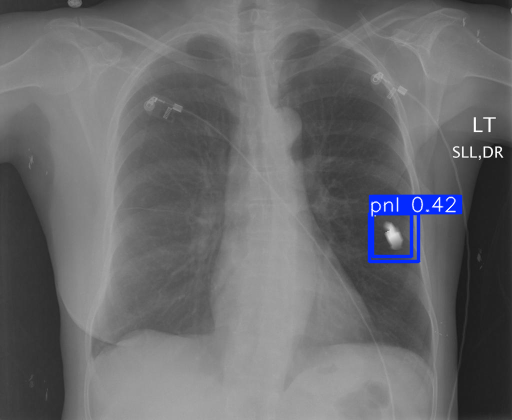

In [ ]:
from PIL import Image
import torch

# YOLO 모델을 불러옵니다.
# 모델이 이미 이전 코드에서 로드된 상태여야 합니다.
# 만약 로드되지 않았다면 이전 코드에서처럼 모델을 로드하세요.

# 입력 이미지의 경로를 설정합니다 (경로를 적절히 수정하세요)
image_path = '/content/drive/MyDrive/yolo300/train/13.png'

# PIL을 사용하여 이미지를 엽니다
image = Image.open(image_path)

# YOLO 모델을 사용하여 추론을 수행합니다
results = model(image)

# results is a list, access the Results object by indexing
results[0].show()  # 바운딩 박스가 표시된 이미지를 보여줍니다.


0: 640x544 1 pnl, 179.2ms
Speed: 3.7ms preprocess, 179.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


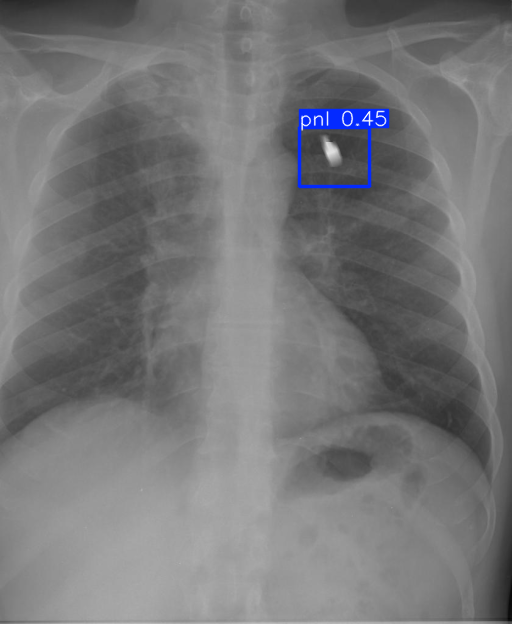

In [ ]:
from PIL import Image
import torch

# YOLO 모델을 불러옵니다.
# 모델이 이미 이전 코드에서 로드된 상태여야 합니다.
# 만약 로드되지 않았다면 이전 코드에서처럼 모델을 로드하세요.

# 입력 이미지의 경로를 설정합니다 (경로를 적절히 수정하세요)
image_path = '/content/drive/MyDrive/yolo300/train/10.png'

# PIL을 사용하여 이미지를 엽니다
image = Image.open(image_path)

# YOLO 모델을 사용하여 추론을 수행합니다
results = model(image)

# results is a list, access the Results object by indexing
results[0].show()  # 바운딩 박스가 표시된 이미지를 보여줍니다.